In [221]:
# import necessary functions
import os
import mysql.connector
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
import schedule
import time
from datetime import datetime, timedelta, time
import logging

In [13]:
# initialize environment variables
# %env MYSQL_PASSWORD=
# %env MYSQL_HOST=
# %env MYSQL_USER=

In [187]:
# connect to mysql
mydb = mysql.connector.connect(
    host = os.getenv('MYSQL_HOST'),
    user = os.getenv('MYSQL_USER'),
    password = os.getenv('MYSQL_PASSWORD')
)

# cursor instance used to execute SQL statements in Python
cursor = mydb.cursor()
 
# creating a database with a name 'factors'
cursor.execute("CREATE DATABASE factors")

In [188]:
mydb = mysql.connector.connect(
    host = os.getenv('MYSQL_HOST'),
    user = os.getenv('MYSQL_USER'),
    password = os.getenv('MYSQL_PASSWORD'),
    database = "factors"
)

cursor = mydb.cursor()
 
# Creating a table called 'results' in the
# 'factors' database
cursor.execute("CREATE TABLE results (factor INT, pi DECIMAL(17,16), time DATETIME)")

In [189]:
# show existing tables
cursor.execute("SHOW TABLES")
 
for x in cursor:
  print(x)

('results',)


In [193]:
# print each row of the results table
try:
    sql_select_Query = "select * from results"
    cursor = mydb.cursor()
    cursor.execute(sql_select_Query)
    # get all records
    records = cursor.fetchall()
    print("Total number of rows in table: ", cursor.rowcount)
    print("\nPrinting each row")
    for row in records:
        print("Factor = ", row[0], )
        print("Pi = ", row[1])
        print("Time  = ", row[2], "\n")
except mysql.connector.Error as e: # catch error if cannot connect to MYySQL
    print("Error reading data from MySQL table", e)

Total number of rows in table:  60

Printing each row
Factor =  1
Pi =  4.0000000000000000
Time  =  2022-05-04 20:00:00 

Factor =  1
Pi =  4.0000000000000000
Time  =  2022-05-04 20:01:00 

Factor =  8
Pi =  3.0170718170718180
Time  =  2022-05-04 20:02:00 

Factor =  27
Pi =  3.1786170109992202
Time  =  2022-05-04 20:03:00 

Factor =  64
Pi =  3.1259686069732880
Time  =  2022-05-04 20:04:00 

Factor =  125
Pi =  3.1495925256000317
Time  =  2022-05-04 20:05:00 

Factor =  216
Pi =  3.1369630487667557
Time  =  2022-05-04 20:06:00 

Factor =  343
Pi =  3.1445080992896712
Time  =  2022-05-04 20:07:00 

Factor =  512
Pi =  3.1396395304524310
Time  =  2022-05-04 20:08:00 

Factor =  729
Pi =  3.1429643950569854
Time  =  2022-05-04 20:09:00 

Factor =  1000
Pi =  3.1405926538397940
Time  =  2022-05-04 20:10:00 

Factor =  1331
Pi =  3.1423439682846700
Time  =  2022-05-04 20:11:00 

Factor =  1728
Pi =  3.1410139499345390
Time  =  2022-05-04 20:12:00 

Factor =  2197
Pi =  3.1420478197018580
T

In [192]:
mydb = mysql.connector.connect(
    host = os.getenv('MYSQL_HOST'),
    user = os.getenv('MYSQL_USER'),
    password = os.getenv('MYSQL_PASSWORD'),
    database = "factors"
)
mycursor = mydb.cursor()

# use logger to see which jobs are running and clear unnecessary jobs
logging.basicConfig()
schedule_logger = logging.getLogger('schedule')
schedule_logger.setLevel(level=logging.DEBUG)

# define function to make api call each minute on the :00 second for one hour
def resultsData():
    # make api call
    responseN = requests.get("https://4feaquhyai.execute-api.us-east-1.amazonaws.com/api/pi").json()
    # insert into MySQL
    sql = "INSERT INTO results (factor, pi, time) VALUES (%s, %s, %s)"
    val = (responseN["factor"], responseN["pi"], responseN["time"])
    mycursor.execute(sql, val)
    mydb.commit()
    # print output
    print(responseN)
    # get current time
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    # print current time
    print(current_time)

# call the resultsData function
schedule.every().minutes.at(":00").until(timedelta(hours=1)).do(resultsData)

#schedule.clear() # if necessary to remove extraneously scheduled jobs

# run the above scheduled job
while True:
    schedule.run_pending()

DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 1, 'pi': 4.0, 'time': '2022-05-04 20:00:00'}
16:00:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 1, 'pi': 4.0, 'time': '2022-05-04 20:01:00'}
16:01:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 8, 'pi': 3.017071817071818, 'time': '2022-05-04 20:02:00'}
16:02:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 27, 'pi': 3.1786170109992202, 'time': '2022-05-04 20:03:00'}
16:03:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 64, 'pi': 3.125968606973288, 'time': '2022-05-04 20:04:00'}
16:04:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 125, 'pi': 3.1495925256000317, 'time': '2022-05-04 20:05:00'}
16:05:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 216, 'pi': 3.1369630487667557, 'time': '2022-05-04 20:06:00'}
16:06:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 343, 'pi': 3.1445080992896712, 'time': '2022-05-04 20:07:00'}
16:07:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 512, 'pi': 3.139639530452431, 'time': '2022-05-04 20:08:00'}
16:08:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 729, 'pi': 3.1429643950569854, 'time': '2022-05-04 20:09:00'}
16:09:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 1000, 'pi': 3.140592653839794, 'time': '2022-05-04 20:10:00'}
16:10:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 1331, 'pi': 3.14234396828467, 'time': '2022-05-04 20:11:00'}
16:11:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 1728, 'pi': 3.141013949934539, 'time': '2022-05-04 20:12:00'}
16:12:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 2197, 'pi': 3.142047819701858, 'time': '2022-05-04 20:13:00'}
16:13:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 2744, 'pi': 3.1412282221150143, 'time': '2022-05-04 20:14:00'}
16:14:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 3375, 'pi': 3.14188894987959, 'time': '2022-05-04 20:15:00'}
16:15:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 4096, 'pi': 3.141348512968434, 'time': '2022-05-04 20:16:00'}
16:16:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 4913, 'pi': 3.1417961952119438, 'time': '2022-05-04 20:17:00'}
16:17:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 5832, 'pi': 3.141421185826989, 'time': '2022-05-04 20:18:00'}
16:18:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 6859, 'pi': 3.141738447436511, 'time': '2022-05-04 20:19:00'}
16:19:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 8000, 'pi': 3.141467653590268, 'time': '2022-05-04 20:20:00'}
16:20:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 9261, 'pi': 3.141700633289284, 'time': '2022-05-04 20:21:00'}
16:21:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 10648, 'pi': 3.141498739239878, 'time': '2022-05-04 20:22:00'}
16:22:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 12167, 'pi': 3.141674843118693, 'time': '2022-05-04 20:23:00'}
16:23:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 13824, 'pi': 3.141520315626915, 'time': '2022-05-04 20:24:00'}
16:24:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 15625, 'pi': 3.141656653589722, 'time': '2022-05-04 20:25:00'}
16:25:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 17576, 'pi': 3.1415357578228837, 'time': '2022-05-04 20:26:00'}
16:26:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 19683, 'pi': 3.1416434588531876, 'time': '2022-05-04 20:27:00'}
16:27:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 21952, 'pi': 3.141547099653953, 'time': '2022-05-04 20:28:00'}
16:28:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 24389, 'pi': 3.1416336556808755, 'time': '2022-05-04 20:29:00'}
16:29:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 27000, 'pi': 3.1415556165527665, 'time': '2022-05-04 20:30:00'}
16:30:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 29791, 'pi': 3.1416262207744947, 'time': '2022-05-04 20:31:00'}
16:31:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 32768, 'pi': 3.1415621360116797, 'time': '2022-05-04 20:32:00'}
16:32:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 35937, 'pi': 3.1416204800638963, 'time': '2022-05-04 20:33:00'}
16:33:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 39304, 'pi': 3.141567210886769, 'time': '2022-05-04 20:34:00'}
16:34:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 42875, 'pi': 3.1416159772049452, 'time': '2022-05-04 20:35:00'}
16:35:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 46656, 'pi': 3.1415712201192867, 'time': '2022-05-04 20:36:00'}
16:36:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 50653, 'pi': 3.141612395757074, 'time': '2022-05-04 20:37:00'}
16:37:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 54872, 'pi': 3.1415744293588412, 'time': '2022-05-04 20:38:00'}
16:38:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 59319, 'pi': 3.141609511594793, 'time': '2022-05-04 20:39:00'}
16:39:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 64000, 'pi': 3.141577028589768, 'time': '2022-05-04 20:40:00'}
16:40:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 68921, 'pi': 3.141607162955563, 'time': '2022-05-04 20:41:00'}
16:41:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 74088, 'pi': 3.1415791561272712, 'time': '2022-05-04 20:42:00'}
16:42:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 79507, 'pi': 3.141605231098648, 'time': '2022-05-04 20:43:00'}
16:43:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 85184, 'pi': 3.1415809142959636, 'time': '2022-05-04 20:44:00'}
16:44:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 91125, 'pi': 3.1416036275266306, 'time': '2022-05-04 20:45:00'}
16:45:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 97336, 'pi': 3.141582379898584, 'time': '2022-05-04 20:46:00'}
16:46:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 103823, 'pi': 3.1416022853668917, 'time': '2022-05-04 20:47:00'}
16:47:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 110592, 'pi': 3.1415836113443634, 'time': '2022-05-04 20:48:00'}
16:48:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 117649, 'pi': 3.1416011534494763, 'time': '2022-05-04 20:49:00'}
16:49:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 125000, 'pi': 3.141584653589728, 'time': '2022-05-04 20:50:00'}
16:50:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 132651, 'pi': 3.1416001921684225, 'time': '2022-05-04 20:51:00'}
16:51:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 140608, 'pi': 3.1415855416188876, 'time': '2022-05-04 20:52:00'}
16:52:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 148877, 'pi': 3.141599370544006, 'time': '2022-05-04 20:53:00'}
16:53:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 157464, 'pi': 3.1415863029318056, 'time': '2022-05-04 20:54:00'}
16:54:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 166375, 'pi': 3.141598664108154, 'time': '2022-05-04 20:55:00'}
16:55:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 175616, 'pi': 3.141586959347785, 'time': '2022-05-04 20:56:00'}
16:56:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 185193, 'pi': 3.1415980533619163, 'time': '2022-05-04 20:57:00'}
16:57:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})


{'factor': 195112, 'pi': 3.1415875283283916, 'time': '2022-05-04 20:58:00'}
16:58:00


DEBUG:schedule:Running job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})
DEBUG:schedule:Cancelling job Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})
DEBUG:schedule:Cancelling job "Job(interval=1, unit=minutes, do=resultsData, args=(), kwargs={})"


{'factor': 205379, 'pi': 3.141597522636734, 'time': '2022-05-04 20:59:00'}
16:59:00


KeyboardInterrupt: 

In [195]:
mydb = mysql.connector.connect(
    host = os.getenv('MYSQL_HOST'),
    user = os.getenv('MYSQL_USER'),
    password = os.getenv('MYSQL_PASSWORD'),
    database = "factors"
)
mycursor = mydb.cursor()

# select the new factor, pi, and time information from the previous api call
mycursor.execute("SELECT factor, pi, time FROM results")
result = mycursor.fetchall
print(result)


<bound method MySQLCursor.fetchall of <mysql.connector.cursor.MySQLCursor object at 0x7fb41b0119a0>>


In [196]:
# instantiate empty lists for factor, pi, and time values and append each value
factors = []
pis = []
times = []
for i in mycursor:
    factors.append(i[0])
    pis.append(i[1])
    times.append(i[2])
print("Factors of API call 16:00-16:59 = ", factors)
print("Pis of API call 16:00-16:59 = ", pis)
print("Times of API call 16:00-16:59 = ", times)

Factors of API call 16:00-16:59 =  [1, 1, 8, 27, 64, 125, 216, 343, 512, 729, 1000, 1331, 1728, 2197, 2744, 3375, 4096, 4913, 5832, 6859, 8000, 9261, 10648, 12167, 13824, 15625, 17576, 19683, 21952, 24389, 27000, 29791, 32768, 35937, 39304, 42875, 46656, 50653, 54872, 59319, 64000, 68921, 74088, 79507, 85184, 91125, 97336, 103823, 110592, 117649, 125000, 132651, 140608, 148877, 157464, 166375, 175616, 185193, 195112, 205379]
Pis of API call 16:00-16:59 =  [Decimal('4.0000000000000000'), Decimal('4.0000000000000000'), Decimal('3.0170718170718180'), Decimal('3.1786170109992202'), Decimal('3.1259686069732880'), Decimal('3.1495925256000317'), Decimal('3.1369630487667557'), Decimal('3.1445080992896712'), Decimal('3.1396395304524310'), Decimal('3.1429643950569854'), Decimal('3.1405926538397940'), Decimal('3.1423439682846700'), Decimal('3.1410139499345390'), Decimal('3.1420478197018580'), Decimal('3.1412282221150143'), Decimal('3.1418889498795900'), Decimal('3.1413485129684340'), Decimal('3.1

Text(0, 0.5, 'Factors')

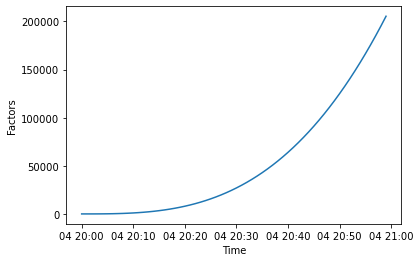

In [222]:
# graph the relationship between time and factor
plt.plot(times, factors)
plt.xlabel("Time")
plt.ylabel("Factors")

Text(0, 0.5, 'Pi Estimate')

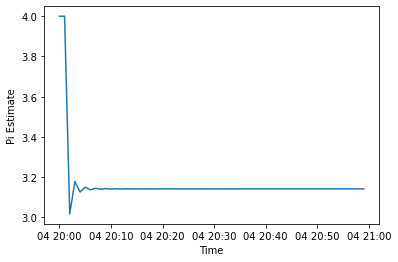

In [218]:
# graph the relationship between time and pi
plt.plot(times, pis)
plt.xlabel("Time")
plt.ylabel("Pi Estimate")

Text(0, 0.5, 'Pi Estimate')

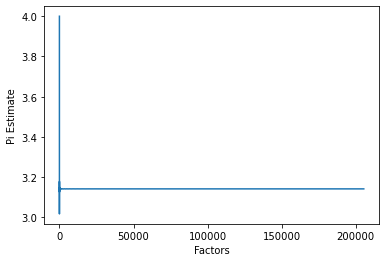

In [220]:
# graph the relationship between factor and pi
plt.plot(factors, pis)
plt.xlabel("Factors")
plt.ylabel("Pi Estimate")